## Imports
Here, we import all the necessary modules and method files.

In [1]:
import utils, PTM
import pandas as pd
from tasks import results
from tasks import cmj, dj, velocity, rjt, hip, nordic, sls, slr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Jump Height
We quantified jump heights during _countermovement jumps_ and _drop jumps_.

### Segmentation and synchronization

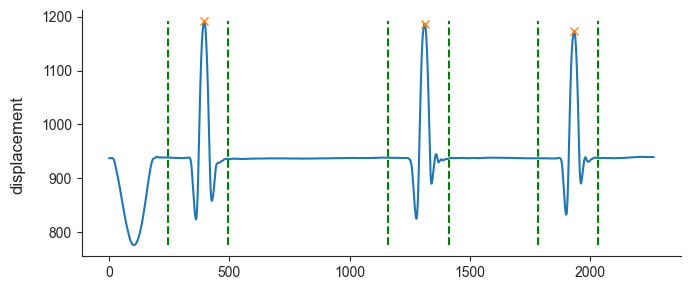

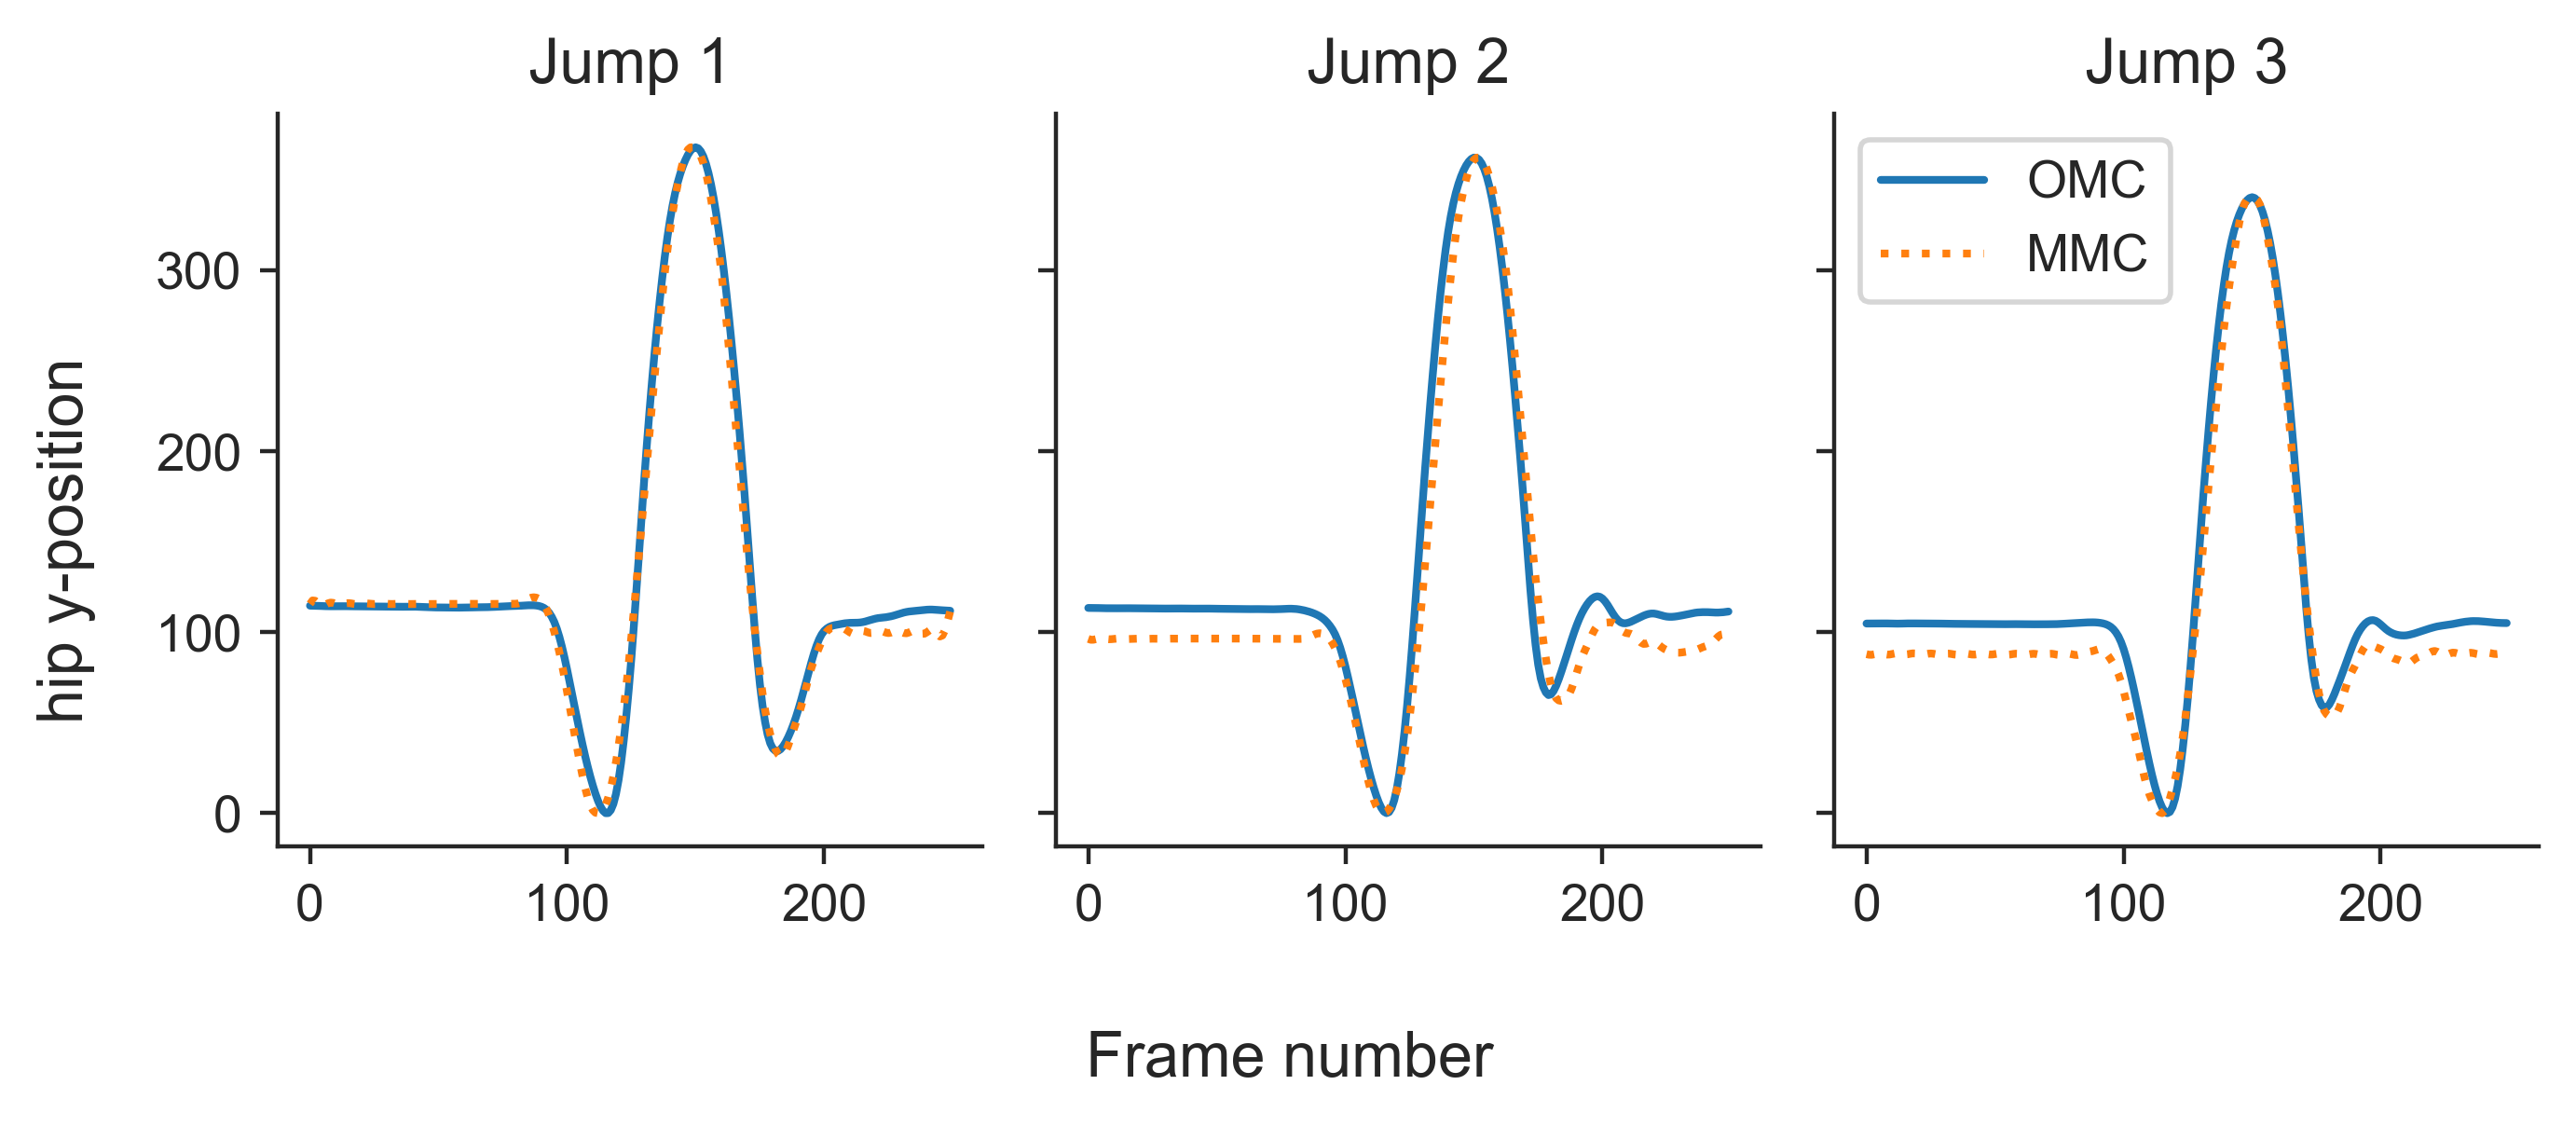

In [2]:
%matplotlib inline
result_dataframes = []
cmj_data = utils.read_list('cmj_data')
dj_data = utils.read_list('dj_data')
op_reps = cmj.visualize_seg(cmj_data)

### Visualize pixel-to-metric with gravity as reference

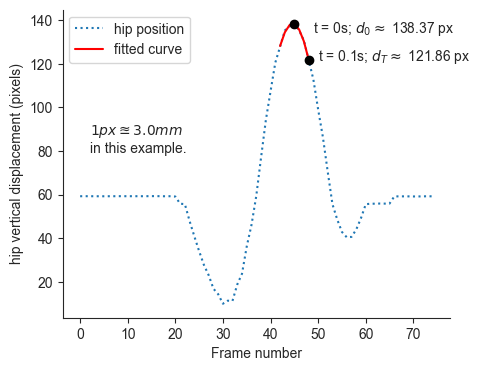

array([2.97052504, 4.0988062 , 3.13686071, 1.82655958, 5.57037773,
       3.33077326, 5.00473341, 3.6982066 , 2.75523808, 2.62163892,
       4.49026291, 4.60733267, 3.5306279 , 4.2389721 , 2.24896246,
       3.64871876])

In [3]:
PTM.gravity(visualize=True)

### Compute jump heights

In [4]:
all_jumps_df_ptmh = cmj.get_jump_heights(cmj_data, ptm='height')
all_jumps_df_ptmg = cmj.get_jump_heights(cmj_data, ptm='gravity')
jump_heights = all_jumps_df_ptmh.rename(
    columns={'op_bl_toe_3': 'MMC bilateral (cm)',
             'op_ul_toe_3': 'MMC unilateral (cm)',
             'fp_bl': 'Force plate bilateral (cm)',
             'fp_ul': 'Force plate unilateral (cm)'})

### A view of jump heights in cm

In [5]:
jump_heights

,Force plate bilateral (cm),MMC bilateral (cm),Force plate unilateral (cm),MMC unilateral (cm)
0,"[23.52, 24.49, 23.41]","[23.84, 25.17, 22.86]","[13.67, 13.92, 15.36]","[16.51, 11.85, 17.43]"
1,"[11.03, 12.4, 12.01]","[9.63, 10.84, 11.45]","[18.93, 8.87, 8.41]","[4.5, 6.56, 4.67]"
2,"[17.33, 16.6, 15.45]","[17.86, 16.33, 15.22]","[11.25, 10.89, 11.03]","[9.92, 11.01, 11.3]"
3,"[16.69, 18.45, 19.42]","[18.38, 18.18, 22.18]","[6.37, 7.12, 7.3]","[2.41, 3.88, 5.05]"
4,"[14.51, 17.15, 15.71]","[16.41, 18.38, 17.1]","[9.27, 10.31, 10.45]","[11.12, 19.53, 12.08]"
5,"[14.76, 15.54, 17.33]","[14.86, 14.7, 16.91]","[6.54, 7.12, 8.22]","[7.09, 7.59, 9.27]"
6,"[11.33, 11.55, 12.32]","[9.28, 12.52, 13.59]","[7.42, 8.8, 6.32]","[3.59, 6.08, 3.3]"
7,"[11.25, 14.93, 14.93]","[9.04, 15.82, 16.34]","[6.04, 5.67, 5.93]","[3.48, 6.01, 6.04]"
8,"[19.13, 17.98, 19.03]","[24.43, 20.57, 20.49]","[6.83, 7.78, 7.12]","[10.49, 13.59, 11.1]"
9,"[17.15, 18.55, 19.81]","[17.09, 15.57, 16.98]","[12.09, 12.87, 11.33]","[14.63, 14.74, 10.41]"


### Bland-Altman plots

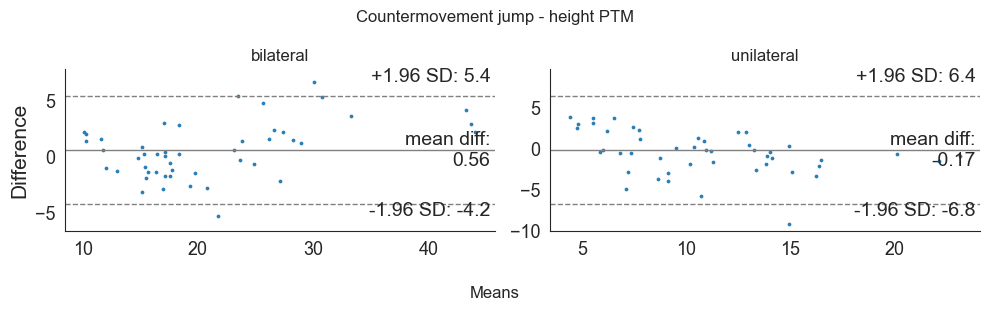

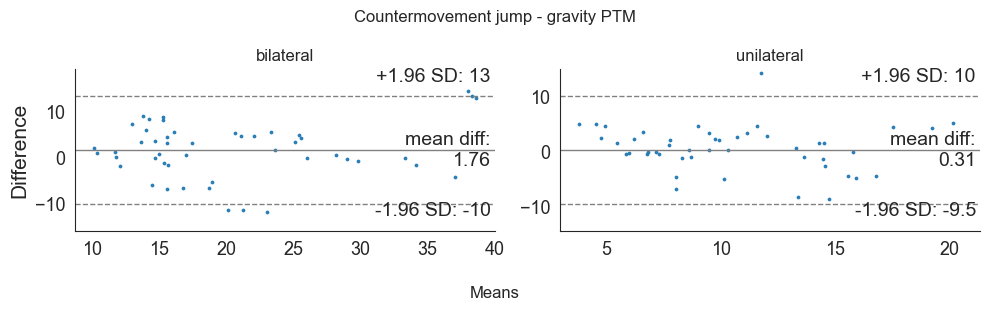

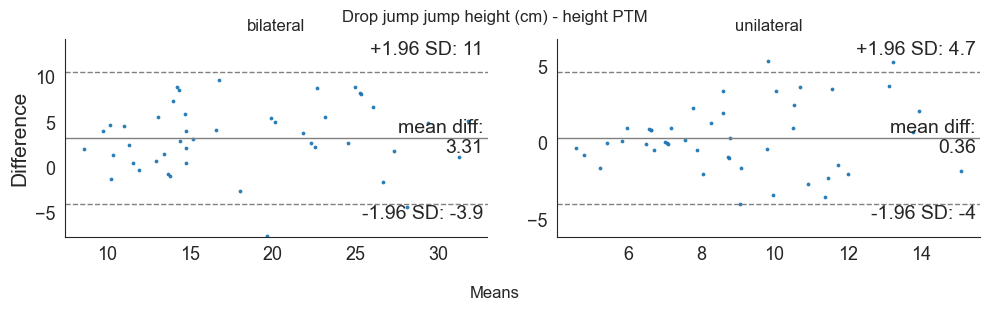

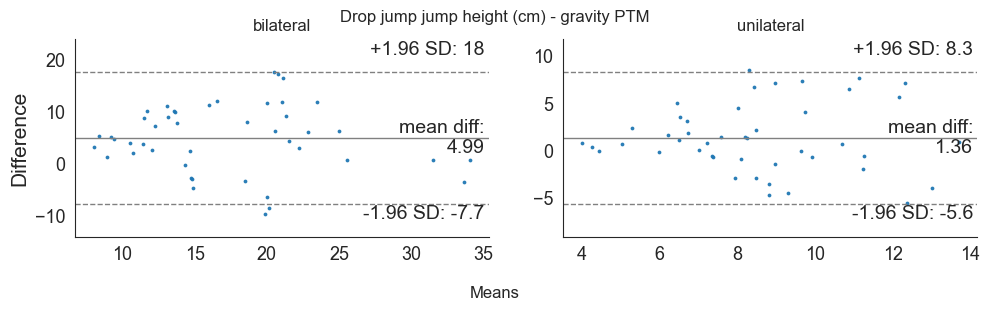

In [6]:
cmj.ba_plots(all_jumps_df_ptmh, title='height PTM')
cmj.ba_plots(all_jumps_df_ptmg, title='gravity PTM')
dj.ba_plots(dj_data, ptm='height')
dj.ba_plots(dj_data, ptm='gravity')
results_df_g = cmj.get_metrics(all_jumps_df_ptmg, ptm='gravity')
results_df_h = cmj.get_metrics(all_jumps_df_ptmh, ptm='height')
dj_metrics_h = dj.get_metrics(dj_data, ptm='height')
dj_metrics_g = dj.get_metrics(dj_data, ptm='gravity')
result_dataframes.extend([results_df_g, results_df_h,
                          *dj_metrics_h, dj_metrics_g])

## Velocity-Based Tests
We quantified mean and peak Velocity during _overhead press_ and _back squat_.

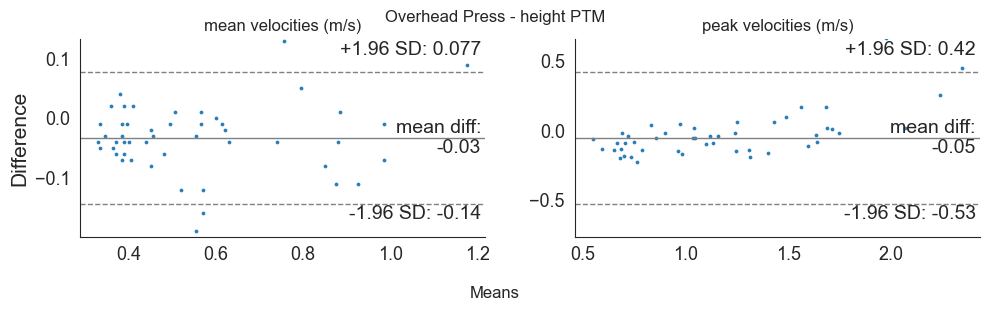

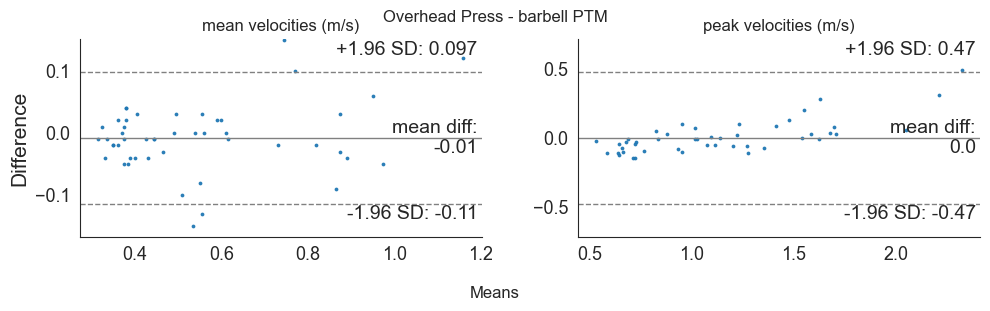

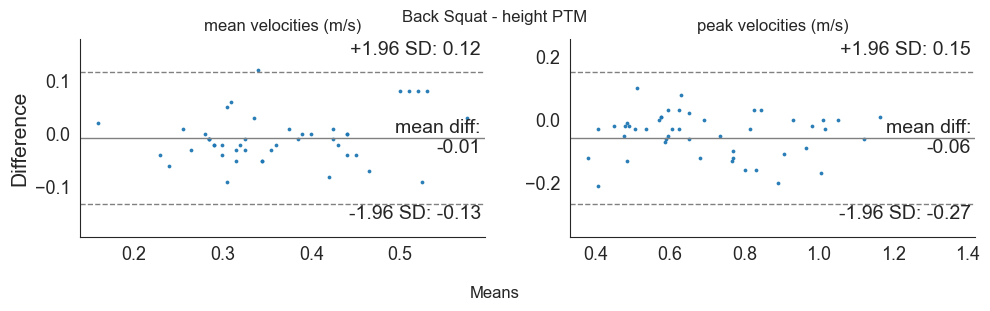

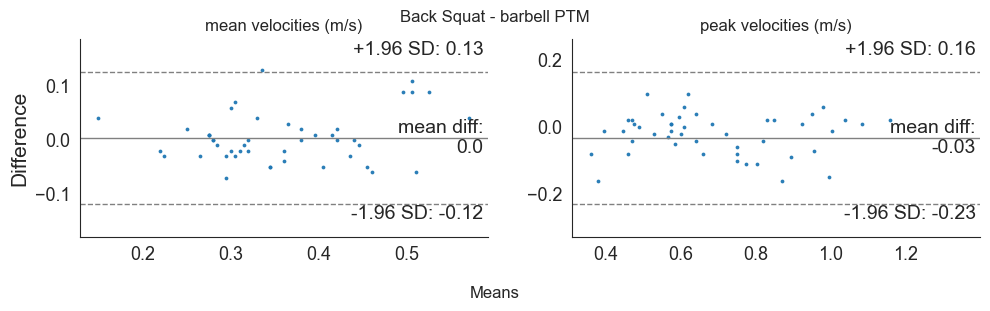

In [7]:
ohp_data = utils.read_list('ohp_data')
bsq_data = utils.read_list('bsq_data')
ohp_res_ptmh = velocity.get_metrics(ohp_data, task='ohp',
                        task_label='Overhead Press', ptm='height')
ohp_res_ptmb = velocity.get_metrics(ohp_data, task='ohp',
                        task_label='Overhead Press', ptm='barbell')
bsq_res_ptmh = velocity.get_metrics(bsq_data, task='bsq',
                        task_label='Back Squat', ptm='height')
bsq_res_ptmb = velocity.get_metrics(bsq_data, task='bsq',
                        task_label='Back Squat', ptm='barbell')
result_dataframes.extend([ohp_res_ptmh, ohp_res_ptmb,
                          bsq_res_ptmh, bsq_res_ptmb])

## Temporal Metrics
We quantified contact time and flight time during _repeated jump tests_ and _drop jumps_.

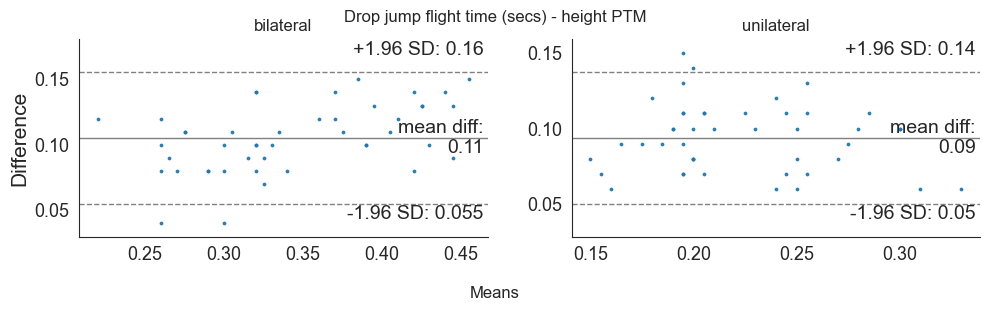

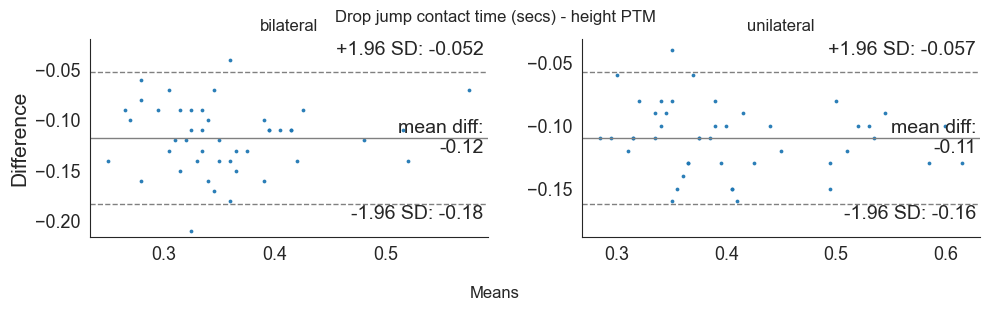

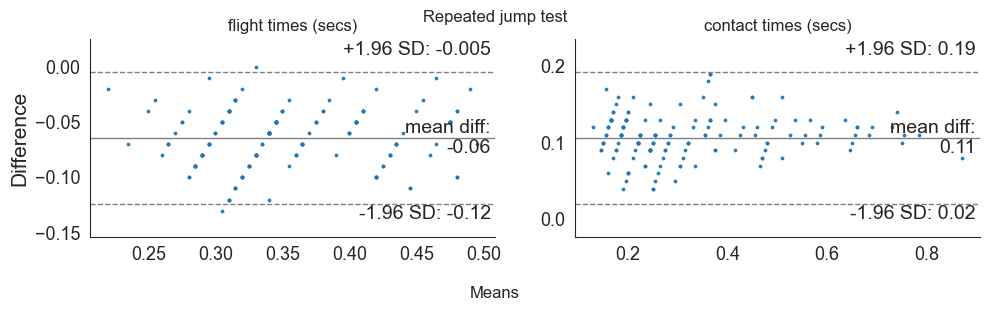

In [8]:
rjt_data = utils.read_list('rjt_data')
dj.ba_plots(dj_data, plot='time')
result_dataframes.append(rjt.get_metrics(rjt_data))

## Angular Metrics
We quantified angular metrics during _hip rotation_, _Nordic curls_, _straight leg raise_, and _single leg squats_.

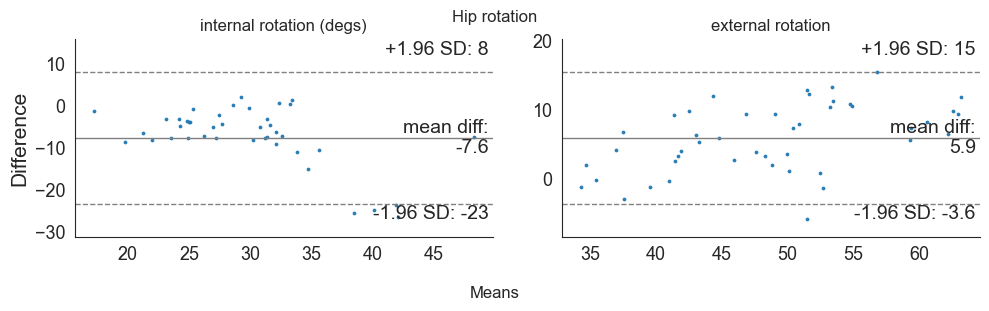

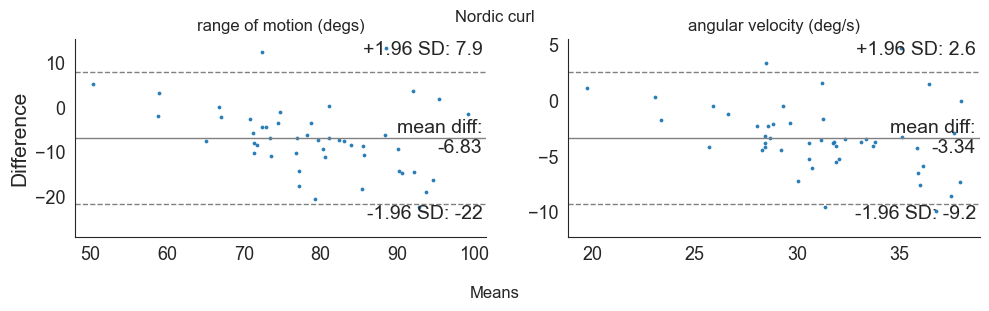

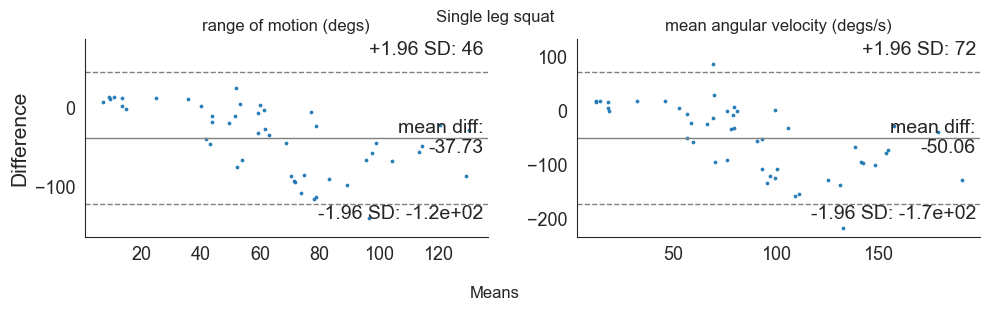

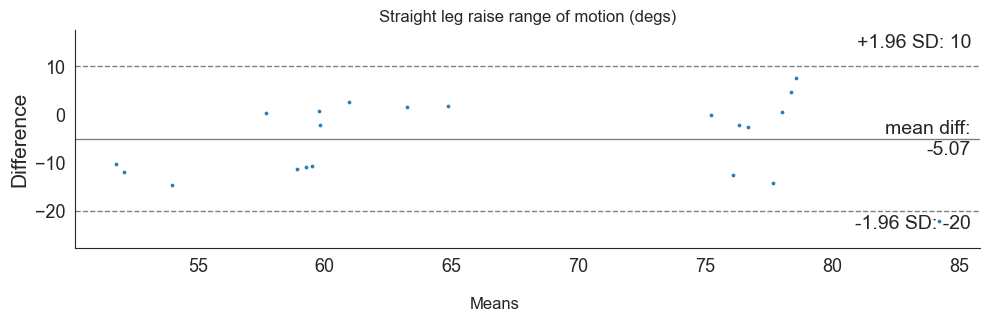

In [9]:
hip_data = utils.read_list('hip_data')
nordic_data = utils.read_list('nordic_data')
sls_data = utils.read_list('sls_data')
slr_data = utils.read_list('slr_data')
result_dataframes.extend([hip.get_metrics(hip_data),
                          nordic.get_metrics(nordic_data),
                          sls.get_metrics(sls_data),
                          slr.get_metrics(slr_data)])

## Results Table

In [10]:
results.show(result_dataframes)

Ground Truth    MAE  \
Metric           Task                  PTM Ref                                  
Angular velocity Nordic curl           N/A      Optical motion capture   3.88   
                 Single leg squat      N/A      Optical motion capture  60.39   
Contact time     Drop jump bilateral   height             Force plates   0.12   
                 Drop jump unilateral  height             Force plates   0.11   
                 Repeated jump test    height             Force plates   0.11   
Flight time      Drop jump bilateral   height             Force plates   0.11   
                 Drop jump unilateral  height             Force plates   0.09   
                 Repeated jump test    height             Force plates   0.07   
Jump height      CMJ bilateral         gravity            Force plates   4.87   
                                       height             Force plates   2.00   
                 CMJ unilateral        gravity            Force plates   3.41   
                                       height             Force plates   2.29   
                 Drop jump bilateral   height             Force plates   4.15   
                                       gravity            Force plates   6.86   
                 Drop jump unilateral  height             Force plates   1.71   
                                       gravity            Force plates   2.89   
Mean velocity    Back Squat            height    Optical motion capure   0.04   
                                       barbell   Optical motion capure   0.04   
                 Overhead Press        height    Optical motion capure   0.05   
                                       barbell   Optical motion capure   0.04   
Peak velocity    Back Squat            height    Optical motion capure   0.07   
                                       barbell   Optical motion capure   0.06   
                 Overhead Press        height    Optical motion capure   0.14   
                                       barbell   Optical motion capure   0.12   
Range of motion  Hip external rotation N/A      Optical motion capture   6.47   
                 Hip internal rotation N/A      Optical motion capture   7.84   
                 Nordic curl           N/A      Optical motion capture   8.51   
                 Single leg squat      N/A      Optical motion capture  43.20   
                 Straight leg raise    N/A      Optical motion capture   6.90   

                                                Reliability   ICC  
Metric           Task                  PTM Ref                     
Angular velocity Nordic curl           N/A             0.53  0.59  
                 Single leg squat      N/A             0.86  0.25  
Contact time     Drop jump bilateral   height          0.53  0.37  
                 Drop jump unilateral  height          0.86  0.54  
                 Repeated jump test    height          0.90  0.80  
Flight time      Drop jump bilateral   height          0.86  0.40  
                 Drop jump unilateral  height          0.80  0.28  
                 Repeated jump test    height          0.52  0.60  
Jump height      CMJ bilateral         gravity         0.95  0.73  
                                       height          0.95  0.96  
                 CMJ unilateral        gravity         0.83  0.50  
                                       height          0.85  0.75  
                 Drop jump bilateral   height          0.80  0.76  
                                       gravity         0.87  0.48  
                 Drop jump unilateral  height          0.39  0.69  
                                       gravity         0.65  0.25  
Mean velocity    Back Squat            height          0.76  0.80  
                                       barbell         0.77  0.80  
                 Overhead Press        height          0.67  0.95  
                                       barbell         0.69  0.97  
Peak velocity    Back Squat            height     